In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
fichierhotel = pd.read_csv('Hotel_Reservations.csv')

In [3]:
# Colonnes du dataset sous forme de liste python

In [4]:
list(fichierhotel.columns)

['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

##### Décrivons les différentes catégories de données du dataset

In [5]:
# Dimensions du dataset

In [6]:
fichierhotel.shape

(36275, 19)

In [7]:
fichierhotel.head() # Premières lignes du dataframe

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
# Pour plus de lisibilité, nous pourrons clarifier les booking_status par les chiffres 
# 1 pour Not Cancelled et 0 pour Cancelled
#df = pd.DataFrame(data,columns=['name','salary'])

#df['name']= df['name'].replace(['michael','louis'],['karl','lionel'])

In [9]:
fichierhotel['booking_status'] = fichierhotel['booking_status'].replace(['Not_Canceled','Canceled'],['1','0'])

In [10]:
fichierhotel.booking_status

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: object

In [11]:
# La méthode value_counts nous donne le nombre d'occurences de chaque élément unique de la liste

In [12]:
fichierhotel.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [13]:
fichierhotel.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [14]:
fichierhotel.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [15]:
fichierhotel.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [16]:
# La méthode describe nous donne les statistiques de base de chaque colonne

In [17]:
fichierhotel.avg_price_per_room.describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

In [29]:
fichierhotel[fichierhotel['room_type_reserved']=='Room_Type 1']

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [30]:
fichierhotel[fichierhotel['room_type_reserved']=='Room_Type 1'].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000
mean,1.770316,0.049378,0.779844,2.125133,0.027693,89.642943,2017.798969,7.445965,15.434447,0.028724,0.026129,0.169428,95.918532,0.557803
std,0.459726,0.228324,0.858207,1.375312,0.164094,90.860265,0.400778,3.097985,8.687151,0.167032,0.384185,1.878310,28.003094,0.749667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,16.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,78.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,59.000000,2018.000000,8.000000,15.000000,0.000000,0.000000,0.000000,94.500000,0.000000
75%,2.000000,0.000000,1.000000,3.000000,0.000000,138.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,112.200000,1.000000
max,3.000000,9.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [31]:
fichierhotel[fichierhotel['room_type_reserved']=='Room_Type 2'].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.0,692.000000,692.000000,692.000000
mean,1.579480,0.588150,0.929191,2.316474,0.049133,101.021676,2017.787572,6.998555,16.507225,0.010116,0.0,0.034682,87.848555,0.761561
std,0.794908,0.953038,0.873745,1.376720,0.216302,85.377079,0.409322,3.506248,8.702592,0.100139,0.0,0.359223,33.953959,0.824426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,32.000000,2018.000000,4.000000,9.000000,0.000000,0.0,0.000000,76.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,75.000000,2018.000000,8.000000,17.000000,0.000000,0.0,0.000000,85.225000,1.000000
75%,2.000000,2.000000,2.000000,3.000000,0.000000,166.000000,2018.000000,10.000000,24.000000,0.000000,0.0,0.000000,100.700000,1.000000
max,3.000000,9.000000,3.000000,10.000000,1.000000,381.000000,2018.000000,12.000000,31.000000,1.000000,0.0,5.000000,284.100000,4.000000


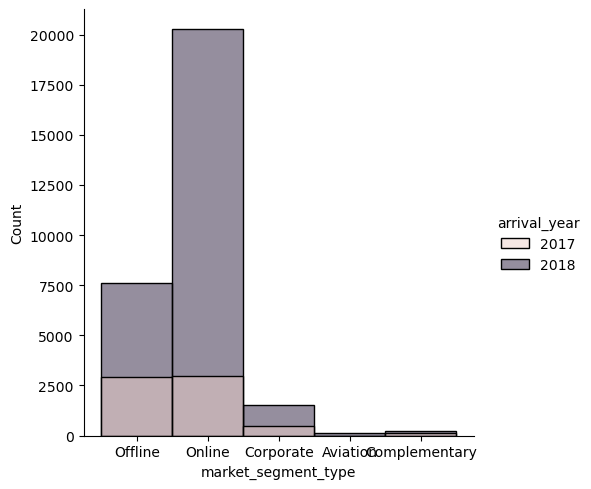

In [19]:
sns.displot(fichierhotel, x="market_segment_type", hue="arrival_year")
plt.show()

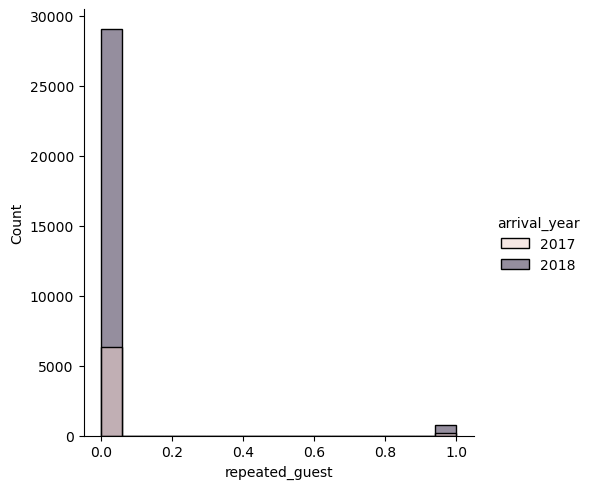

In [20]:
sns.displot(fichierhotel, x="repeated_guest", hue="arrival_year")
plt.show()

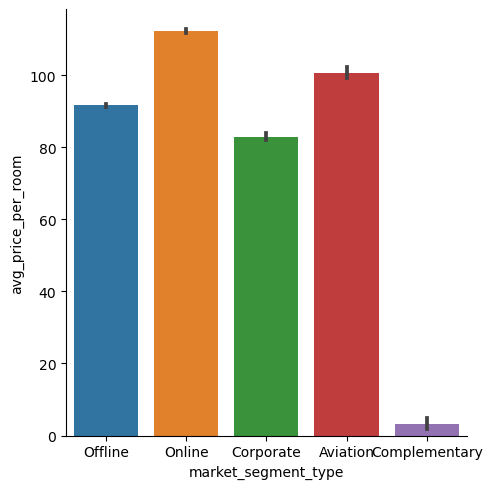

In [21]:
sns.catplot(x= 'market_segment_type', y='avg_price_per_room', kind ='bar', data=fichierhotel)
plt.show()

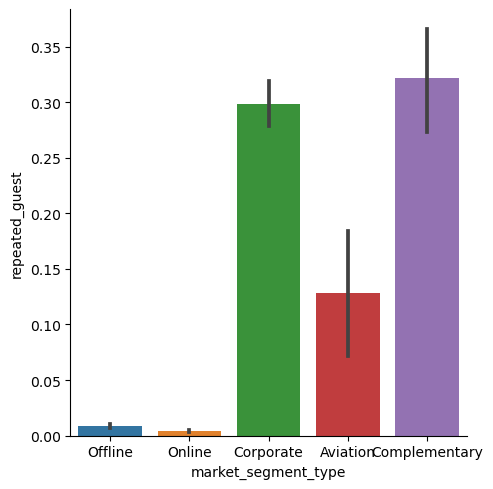

In [22]:
sns.catplot(x= 'market_segment_type', y='repeated_guest', kind ='bar', data=fichierhotel)
plt.show()

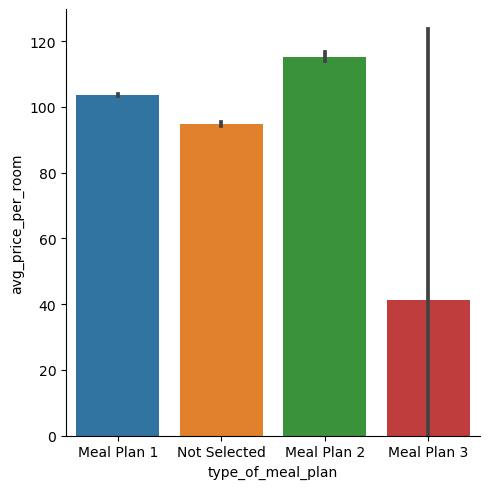

In [23]:
sns.catplot(x= 'type_of_meal_plan', y='avg_price_per_room', kind ='bar', data=fichierhotel)
plt.show()

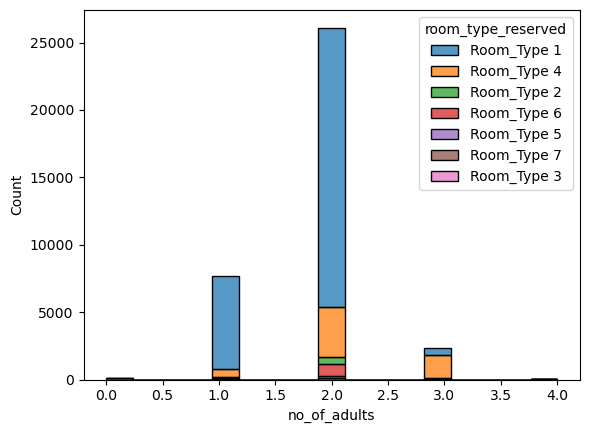

In [24]:
sns.histplot(data=fichierhotel, x="no_of_adults", hue="room_type_reserved", multiple="stack")
plt.show()

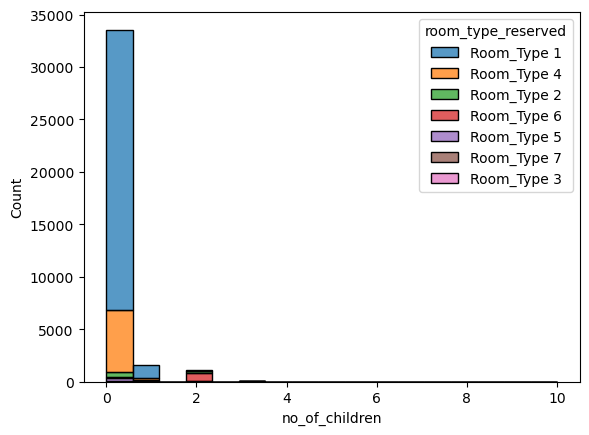

In [25]:
sns.histplot(data=fichierhotel, x="no_of_children", hue="room_type_reserved", multiple="stack")
plt.show()

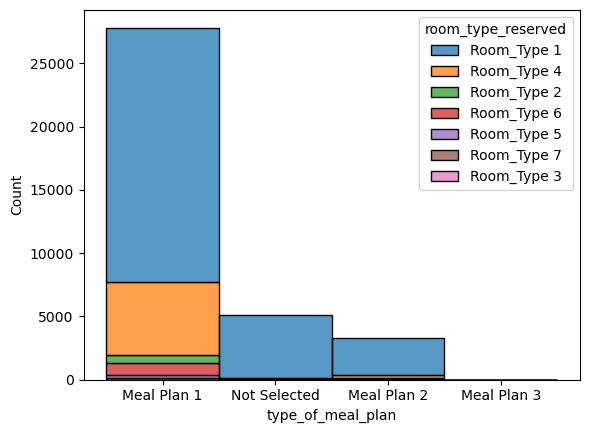

In [26]:
sns.histplot(data=fichierhotel, x="type_of_meal_plan", hue="room_type_reserved", multiple="stack")
plt.show()

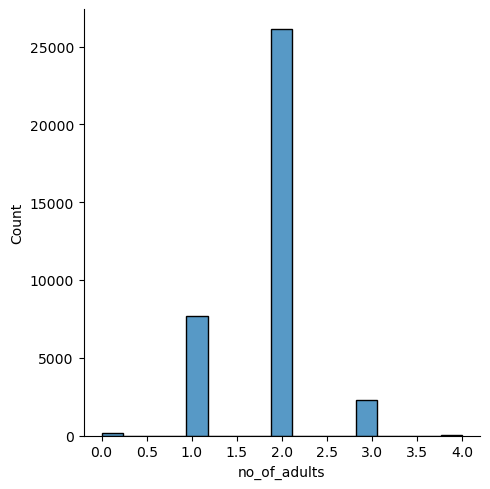

In [27]:
sns.displot(data=fichierhotel, x="no_of_adults")
plt.show()

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


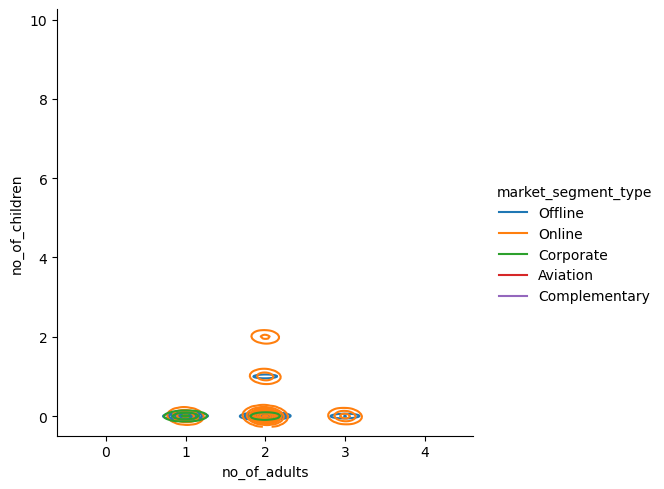

In [28]:
sns.displot(fichierhotel, x="no_of_adults", y="no_of_children", hue="market_segment_type", kind="kde")
plt.show()

### Conclusion